In [1]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from Base_Files.ClassLevyJumpProcesses import TemperedStableSubordinator

In [2]:
def GaussianKernel(coords, l):
    D = squareform(pdist(coords))
    return np.exp(-D**2/(2*l**2))


In [3]:
def GaussianProcess(coords, l, N):
    K = GaussianKernel(coords, l)

    # Generate a vector of Gaussian vales - N(0, I)
    z = np.random.randn(N)

    # Calculate the Cholesky decomposition of K. This is the matric such that K = L L^T
    L = np.linalg.cholesky(K + 1e-6 * np.eye(N))

    # Matrix multiply L and z
    u = L @ z

    return u

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


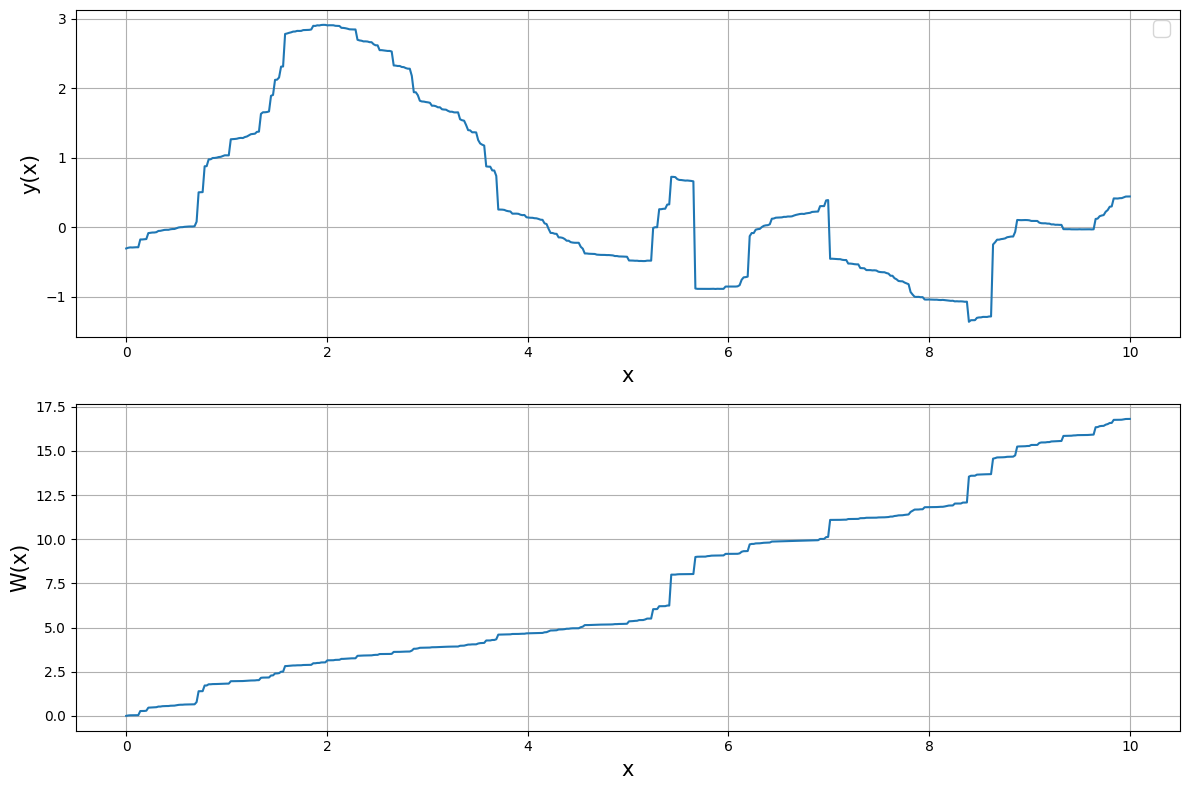

In [4]:
t1 = 0.0
t2 = 10.0
num_obs = 500
num_epochs = 2000
subordinator_truncation = 0.0
kappa = 0.5#0.7
delta = 2.1#1.5
gamma = 1.25#1.0
nProcesses = 1

g_sub = TemperedStableSubordinator(t1, t2, num_obs, num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma)
for i in range(nProcesses):
    g_sub.generate_path()

N = num_obs
W = g_sub.generate_path().reshape(-1, 1)
l = 1

X = np.linspace(t1, t2, num_obs).reshape(-1, 1)

fig, ax = plt.subplots(nrows=2, figsize=(12,8))

ax[0].plot(X, GaussianProcess(W, l, N))
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('y(x)', fontsize=15)
ax[0].grid(True)
ax[0].legend(fontsize=15)

ax[1].plot(X, W)
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('W(x)', fontsize=15)
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
t1 = 0.0
t2 = 10.0
num_obs = 500
num_epochs = 2000
subordinator_truncation = 0.0
kappa = 0.2
delta = 1.2
gamma = 0.3
nProcesses = 1

g_sub = TemperedStableSubordinator(t1, t2, num_obs, num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma)
for i in range(nProcesses):
    g_sub.generate_path()

N = num_obs
W = g_sub.generate_path().reshape(-1, 1)
l = 1

X = np.linspace(t1, t2, num_obs).reshape(-1, 1)

fig, ax = plt.subplots(nrows=2, figsize=(12,8))

ax[0].plot(X, GaussianProcess(W, l, N))
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('y(x)', fontsize=15)
ax[0].grid(True)
ax[0].legend(fontsize=15)

ax[1].plot(X, W)
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('W(x)', fontsize=15)
ax[1].grid(True)

plt.tight_layout()
plt.show()